In [9]:
import numpy as np
import cv2
import face_recognition
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
image = cv2.imread("smile1.jpg")

face_landmarks_list = face_recognition.face_landmarks(image)
print(face_landmarks_list)

[{'chin': [(94, 91), (95, 100), (97, 109), (100, 118), (103, 126), (109, 134), (116, 141), (124, 146), (134, 148), (143, 144), (150, 138), (156, 130), (161, 121), (163, 111), (163, 101), (163, 92), (163, 83)], 'left_eyebrow': [(97, 84), (100, 78), (106, 75), (113, 74), (119, 76)], 'right_eyebrow': [(133, 74), (139, 71), (146, 70), (153, 72), (157, 78)], 'nose_bridge': [(127, 82), (128, 89), (128, 96), (129, 103)], 'nose_tip': [(122, 106), (126, 107), (130, 108), (134, 106), (137, 105)], 'left_eye': [(106, 87), (110, 85), (114, 84), (118, 86), (114, 87), (110, 87)], 'right_eye': [(137, 84), (141, 81), (145, 81), (149, 82), (146, 83), (142, 84)], 'top_lip': [(114, 116), (120, 114), (126, 113), (131, 113), (136, 112), (142, 111), (149, 111), (147, 112), (136, 114), (131, 116), (126, 116), (116, 116)], 'bottom_lip': [(149, 111), (144, 120), (137, 125), (132, 127), (127, 127), (120, 124), (114, 116), (116, 116), (127, 122), (132, 122), (137, 121), (147, 112)]}]


In [5]:
top_lip = face_landmarks_list[0]['top_lip']
bottom_lip = face_landmarks_list[0]['bottom_lip']
print(top_lip)
print(bottom_lip)

[(114, 116), (120, 114), (126, 113), (131, 113), (136, 112), (142, 111), (149, 111), (147, 112), (136, 114), (131, 116), (126, 116), (116, 116)]
[(149, 111), (144, 120), (137, 125), (132, 127), (127, 127), (120, 124), (114, 116), (116, 116), (127, 122), (132, 122), (137, 121), (147, 112)]


In [11]:
#annotate index number for lip points
def add_index(ax, text, x, y, v_offset=3, color='black'):
    ax.annotate(text,
               xy = (x, y),
               xytext = (0, v_offset),
               textcoords = 'offset points',
               ha = 'center',
               va = 'bottom',
               color = color
               )

# draw height line
def draw_line(ax,x1,y1,x2,y2,color='black'):
    ax.annotate('', # empty text
                xy=(x1, y1),
                xytext=(x2, y2),
                ha='center', # ha = 'left',
                va='bottom',
                arrowprops=dict(edgecolor=color,arrowstyle="<->",linestyle='--') # facecolor=color,
               )    
    
    
def plot_mouth():
    x1 = [x for x,y in top_lip]
    y1 = [y for x,y in top_lip]
    x2 = [x for x,y in bottom_lip]
    y2 = [y for x,y in bottom_lip]
    
    fig, ax = plt.subplots()
    ax.plot(x1, y1, color='green', marker='o')
    ax.plot(x2, y2, color='blue', marker='x')
    
    plt.gca().invert_yaxis()
    
    #add index number for top lip
    for i in range(12):
        x = top_lip[i][0]
        y = top_lip[i][1]
        add_index(ax,str(i),x,y,color='green',v_offset=5)
        
    #add index for bottom lip
    for i in range(12):
        x = bottom_lip[i][0]
        y = bottom_lip[i][1]
        add_index(ax, str(i), x, y, color='blue', v_offset=-20)
        
     # draw line - top lip
    for i in [2,3,4]:
        x1 = top_lip[i][0]
        y1 = top_lip[i][1]
        x2 = top_lip[12-i][0]
        y2 = top_lip[12-i][1]
        draw_line(ax,x1,y1,x2,y2,color='green')

    # draw line - bottom lip
    for i in [2,3,4]:
        x1 = bottom_lip[i][0]
        y1 = bottom_lip[i][1]
        x2 = bottom_lip[12-i][0]
        y2 = bottom_lip[12-i][1]
        draw_line(ax,x1,y1,x2,y2,color='blue')

    # draw line - mouth
    for i in [8,9,10]:
        x1 = top_lip[i][0]
        y1 = top_lip[i][1]
        x2 = bottom_lip[18-i][0]
        y2 = bottom_lip[18-i][1]
        draw_line(ax,x1,y1,x2,y2,color='black')

    # annotate height
    # top lip height
    x = (top_lip[4][0] + top_lip[8][0])/2
    y = (top_lip[4][1] + top_lip[8][1])/2
    ax.annotate('lip height',
                xy=(x, y), xytext=(5,0), textcoords='offset points',
                ha='left', va='top',color='green')

    # bottom lip height
    x = (bottom_lip[2][0] + bottom_lip[10][0])/2
    y = (bottom_lip[2][1] + bottom_lip[10][1])/2
    ax.annotate('lip height',
                xy=(x, y), xytext=(5,0), textcoords='offset points',
                ha='left', va='bottom',color='blue')

    # mouth height
    x = (top_lip[8][0] + bottom_lip[10][0])/2
    y = (top_lip[8][1] + bottom_lip[10][1])/2
    ax.annotate('mouth height',
                xy=(x, y), xytext=(5,0), textcoords='offset points',
                ha='left', va='bottom',color='black')

    plt.show()

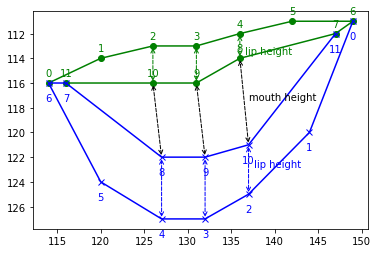

In [12]:
plot_mouth()